In [256]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import copy

In [257]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 10)

In [258]:
data = pd.read_csv("latestdata.csv")
data = data[["age", "sex", "city", "symptoms", "lives_in_Wuhan", "chronic_disease_binary", "outcome"]]
data

,age,sex,city,symptoms,lives_in_Wuhan,chronic_disease_binary,outcome
0,NaN,male,Shek Lei,NaN,NaN,False,"critical condition, intubated as of 14.02.2020"
1,78,male,Vo Euganeo,NaN,NaN,False,death
2,61,female,NaN,NaN,NaN,False,discharge
3,NaN,NaN,Zhengzhou City,NaN,NaN,False,NaN
4,NaN,NaN,Pingxiang City,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...
2676306,52,female,Calleria,NaN,NaN,False,NaN
2676307,52,female,Pueblo Libre,NaN,NaN,False,NaN
2676308,52,female,Comas,NaN,NaN,False,NaN
2676309,52,male,Callao,NaN,NaN,False,NaN


In [259]:
data["age"].count()

578018

In [260]:
data["sex"].count()

580157

In [261]:
data["city"].count()

1698630

In [262]:
data["lives_in_Wuhan"].count()

4338

In [263]:
data["symptoms"].count()

2052

In [264]:
data["chronic_disease_binary"].value_counts()

False    2676124
True         187
Name: chronic_disease_binary, dtype: int64

In [265]:
data["outcome"].count()

307382

In [266]:
data = data[["age", "sex", "city", "chronic_disease_binary", "outcome"]]

In [267]:
data.dropna(subset = ["age", "sex", "city", "chronic_disease_binary", "outcome"], inplace = True)
data = data[data["age"].apply(lambda x: str(x).isdigit())]
data.reset_index(drop=True, inplace=True)

for i in range(len(data)):
    data["age"][i] = int(data["age"][i])

data

,age,sex,city,chronic_disease_binary,outcome
0,78,male,Vo Euganeo,False,death
1,79,female,Mei Hwan Drive,False,discharge
2,25,male,Fernvale Road,False,discharge
3,40,male,Woodlands Crescent,False,discharge
4,43,male,Lorong 8 Toa Payoh,False,discharge
...,...,...,...,...,...
32472,15,male,Timisoara,False,discharged
32473,16,female,Hunedoara,False,discharged
32474,38,male,Habana Vieja,False,death
32475,66,male,Bourbon County,False,death


In [268]:
le_sex = LabelEncoder()
le_city = LabelEncoder()
le_chronic_disease_binary = LabelEncoder()
le_outcome = LabelEncoder()

data["sex_n"] = le_sex.fit_transform(data["sex"])
data["city_n"] = le_sex.fit_transform(data["city"])
data["chronic_disease_binary_n"] = le_chronic_disease_binary.fit_transform(data["chronic_disease_binary"])
data["outcome_n"] = le_outcome.fit_transform(data["outcome"])

data

,age,sex,city,chronic_disease_binary,outcome,sex_n,city_n,chronic_disease_binary_n,outcome_n
0,78,male,Vo Euganeo,False,death,1,1556,0,13
1,79,female,Mei Hwan Drive,False,discharge,0,929,0,15
2,25,male,Fernvale Road,False,discharge,1,456,0,15
3,40,male,Woodlands Crescent,False,discharge,1,1568,0,15
4,43,male,Lorong 8 Toa Payoh,False,discharge,1,818,0,15
...,...,...,...,...,...,...,...,...,...
32472,15,male,Timisoara,False,discharged,1,1490,0,16
32473,16,female,Hunedoara,False,discharged,0,569,0,16
32474,38,male,Habana Vieja,False,death,1,531,0,13
32475,66,male,Bourbon County,False,death,1,255,0,13


In [269]:
data_n = data.drop(["sex", "city", "chronic_disease_binary", "outcome"], axis="columns")
data_n

,age,sex_n,city_n,chronic_disease_binary_n,outcome_n
0,78,1,1556,0,13
1,79,0,929,0,15
2,25,1,456,0,15
3,40,1,1568,0,15
4,43,1,818,0,15
...,...,...,...,...,...
32472,15,1,1490,0,16
32473,16,0,569,0,16
32474,38,1,531,0,13
32475,66,1,255,0,13


In [270]:
drop_indexes_training = []
drop_indexes_testing = []
for i in range(int(len(data_n)/9)):
    drop_indexes_training.append(i)
for i in range(int(len(data_n)/9), len(data_n)):
    drop_indexes_testing.append(i)

training = data_n.drop(drop_indexes_training)
training.reset_index(drop=True, inplace=True)
testing = data_n.drop(drop_indexes_testing)
testing.reset_index(drop=True, inplace=True)

training

,age,sex_n,city_n,chronic_disease_binary_n,outcome_n
0,20,1,330,0,6
1,18,0,330,0,6
2,19,0,330,0,6
3,15,1,330,0,6
4,51,1,330,0,6
...,...,...,...,...,...
28864,15,1,1490,0,16
28865,16,0,569,0,16
28866,38,1,531,0,13
28867,66,1,255,0,13


In [271]:
testing

,age,sex_n,city_n,chronic_disease_binary_n,outcome_n
0,78,1,1556,0,13
1,79,0,929,0,15
2,25,1,456,0,15
3,40,1,1568,0,15
4,43,1,818,0,15
...,...,...,...,...,...
3603,8,1,330,0,6
3604,45,1,330,0,6
3605,55,0,330,0,6
3606,44,0,330,0,6


In [272]:
def arrange_to_clusters(label, data_attributes, cluster_num):
    clusters = []

    for i in range(cluster_num):
        arr = []
        clusters.append(arr)

    for i in range(len(label)):
        clusters[label[i]].append(copy.deepcopy(data_attributes.loc[i]))
    return clusters

def total_distance(kmeans, clusters):
    sum_distance = 0
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            sum_distance = sum_distance + np.linalg.norm(clusters[i][j]-kmeans.cluster_centers_[i])
    return sum_distance

In [273]:
cluster_number = []
for i in range(2, 38):
    cluster_number.append(i+2)

distances_to_centers = []
for i in range(len(cluster_number)):
    kmeans_train = KMeans(n_clusters=cluster_number[i], n_init=10)
    kmeans_train.fit(copy.deepcopy(training))

    predict = kmeans_train.predict(testing)
    clusters = arrange_to_clusters(predict, testing, cluster_number[i])

    distance = total_distance(kmeans_train, clusters)
    distances_to_centers.append(distance)

Text(0, 0.5, 'Distances')

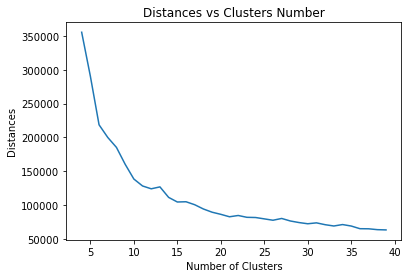

In [274]:
plt.plot(cluster_number, distances_to_centers)
plt.title("Distances vs Clusters Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Distances")

In [277]:
differences = []
for i in range(len(cluster_number)):
    kmeans_train = KMeans(n_clusters=cluster_number[i], n_init=10)
    kmeans_train.fit(copy.deepcopy(training))

    kmeans_test = KMeans(n_clusters=cluster_number[i], n_init=10)
    kmeans_test.fit(copy.deepcopy(testing))

    clusters = arrange_to_clusters(kmeans_test.labels_, testing, cluster_number[i])
    differences.append(total_distance(kmeans_train, clusters))

Text(0, 0.5, 'Difference')

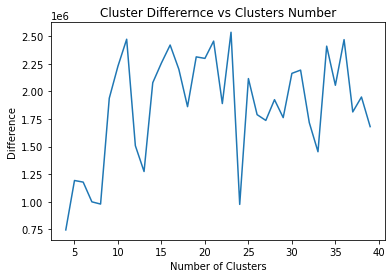

In [278]:
plt.plot(cluster_number, differences)
plt.title("Cluster Differernce vs Clusters Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Difference")